In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Numerical checking of consistency between basic QR, general QR, and SVD representations of OLS estimator

We assume we are fitting a polynomial of degree 3 in the implementation below.

In [27]:
n = 10
p = 4

In [28]:
predictor_values = np.random.rand(n, 1) + 1
intercept_col = np.ones((n, 1))
input_matrix = np.hstack([intercept_col,
                          predictor_values, 
                          np.power(predictor_values, 2), 
                          np.power(predictor_values, 3)])

In [38]:
# give the response vector some form of relation to the predictors, then add noise
f = np.power(predictor_values, 3) + 93 * np.power(predictor_values, 1)
f += np.random.normal(0, 10, (n, 1))

In [39]:
# basic QR
Q, R = np.linalg.qr(input_matrix)

In [40]:
# general QR
Q_squiggle, R_squiggle, P_idx = scipy.linalg.qr(input_matrix, pivoting=True, mode='economic')
P = np.zeros((p, p))
P[P_idx, np.arange(0, p)] = 1 # creating the permutation matrix

In [41]:
# SVD
U, S, V_transpose = np.linalg.svd(input_matrix, full_matrices=False)
S = np.diag(S)
V = V_transpose.T

In [42]:
c_qr = np.linalg.inv(R) @ Q.T @ f
c_qr_general = P @ np.linalg.inv(R_squiggle) @ Q_squiggle.T @ f
c_svd = V @ np.linalg.inv(S) @ U.T @ f

In [43]:
c_qr, c_svd, c_qr_general

(array([[ 1145.09682065],
        [-2089.27462827],
        [ 1327.39577219],
        [ -259.73641458]]),
 array([[ 1145.09682065],
        [-2089.27462827],
        [ 1327.39577219],
        [ -259.73641458]]),
 array([[ 1145.09682065],
        [-2089.27462827],
        [ 1327.39577219],
        [ -259.73641458]]))

These look the same!

## Plotting the polynomials

In [44]:
poly_slopes = c_qr.flatten()[::-1] # order reversed to align with numpy's default format

In [45]:
sample_x_space = np.linspace(1, 2, 100)
best_fit_values = np.polyval(poly_slopes, sample_x_space)

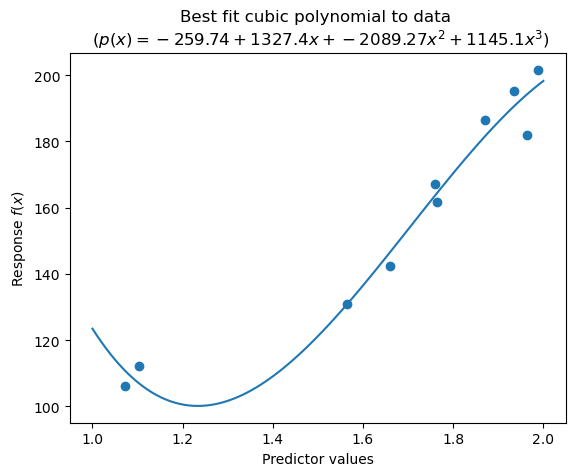

In [46]:
plt.plot(sample_x_space, best_fit_values)
plt.scatter(predictor_values, f)
plt.xlabel("Predictor values")
plt.ylabel(r"Response $f(x)$")
poly_slopes = np.round(poly_slopes, 2)
plt.title(f"Best fit cubic polynomial to data \n ($p(x) = {poly_slopes[0]} + {poly_slopes[1]}x + {poly_slopes[2]}x^2 + {poly_slopes[3]}x^3$)")
plt.show()